In [30]:
import pandas as pd
import matplotlib
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

import itertools

In [4]:
data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [5]:
y = data
y['Month'] = pd.to_datetime(y['Month'])
y.index = y['Month']
del y['Month']
y['Passengers'] = y['#Passengers']
del y['#Passengers']
y

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


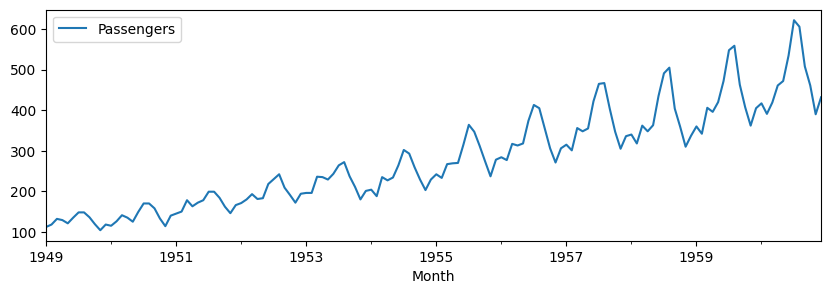

In [6]:
matplotlib.rcParams['figure.figsize'] = [10, 3]
y.plot()
pyplot.show()

Text(0.5, 0.98, 'Мультиплікатива модель')

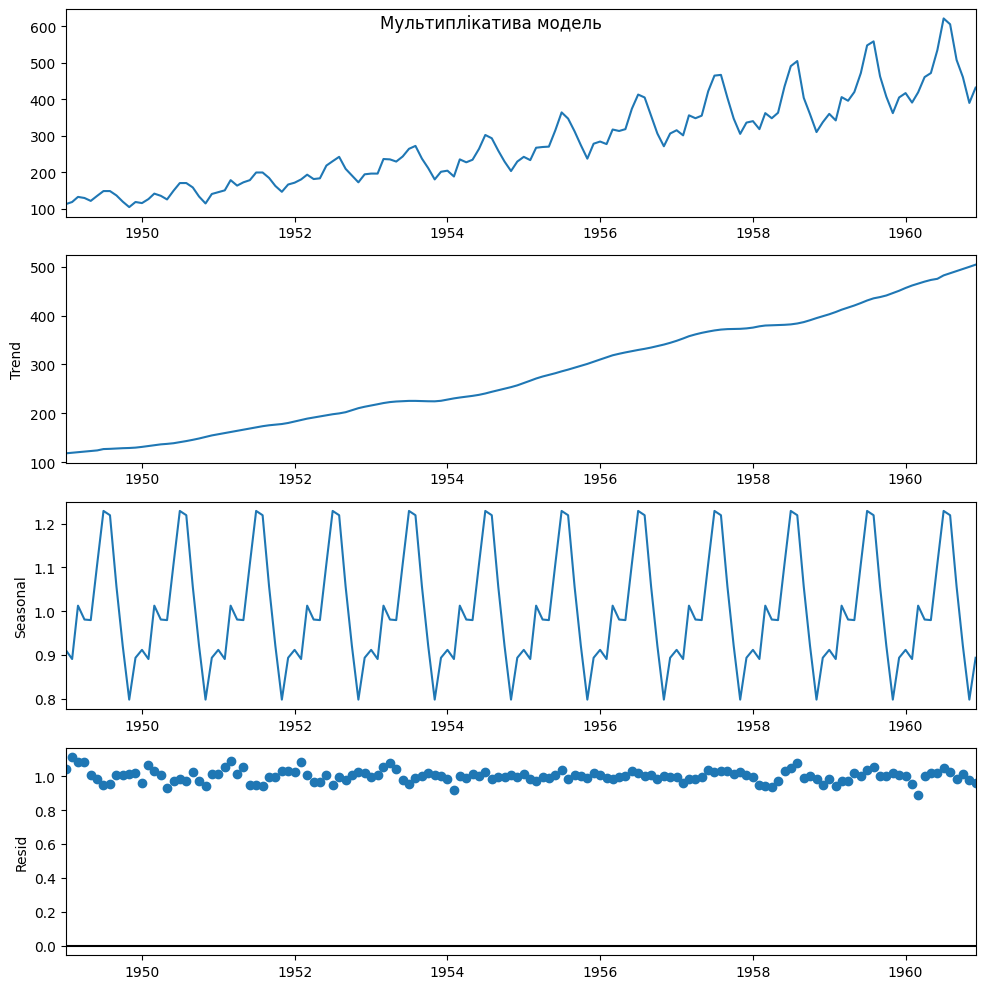

In [7]:
result_decompose = seasonal_decompose(data, model='multiplicative', extrapolate_trend=12)

plt.rcParams.update({'figure.figsize': (10,10)})
result_decompose.plot().suptitle('Мультиплікатива модель')

In [8]:
acf_value = acf(y.Passengers)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

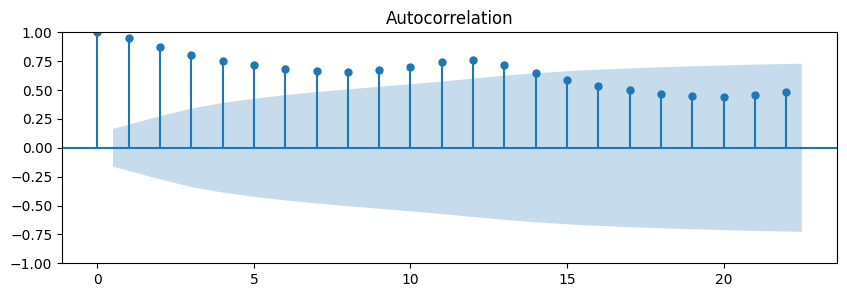

In [9]:
matplotlib.rcParams['figure.figsize']=[10,3]
plot_acf(y.Passengers)
pyplot.show()

In [10]:
pacf_value = pacf(y.Passengers, nlags=3)
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

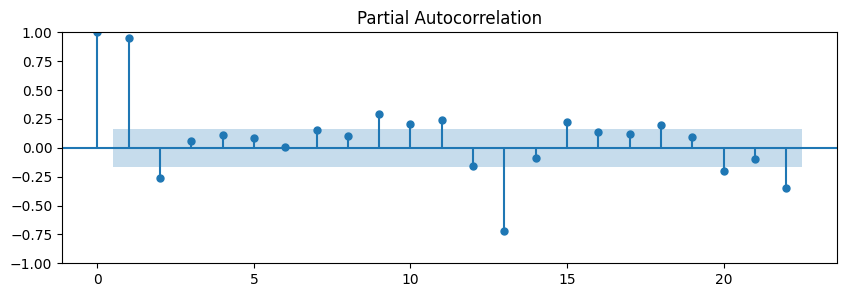

In [11]:
matplotlib.rcParams['figure.figsize']=[10,3]
plot_pacf(y.Passengers)
pyplot.show()

In [12]:
import statsmodels.api as sa

In [20]:
src_data_model = y.Passengers[:120]
model = sa.tsa.ARIMA(src_data_model).fit()

/home/anton7/PycharmProjects/Petrovskyi_Anton_Homework/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/anton7/PycharmProjects/Petrovskyi_Anton_Homework/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/anton7/PycharmProjects/Petrovskyi_Anton_Homework/venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Passengers   No. Observations:                  120
Model:                          ARIMA   Log Likelihood                -716.163
Date:                Wed, 15 Mar 2023   AIC                           1436.325
Time:                        11:05:40   BIC                           1441.900
Sample:                    01-01-1949   HQIC                          1438.589
                         - 12-01-1958                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        245.9083      9.695     25.364      0.000     226.906     264.911
sigma2      8932.0412   1438.175      6.211      0.000    6113.270    1.18e+04
===================================================================================
Ljung-Box (L1) (Q):                 109.17   Jarque-Bera (JB):                 7.49
Prob(Q):                              0.00   Prob(JB):                         0.02
Heteroskedasticity (H):               1.48   Skew:                             0.58
Prob(H) (two-sided):                  0.22   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
pred = model.predict(120,143, typ='levels')

<AxesSubplot: xlabel='Month'>

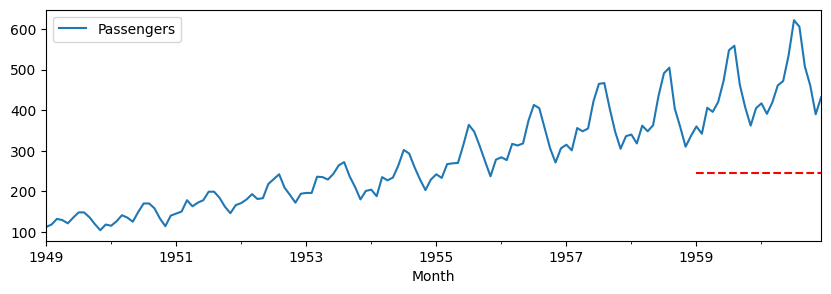

In [16]:
y.plot()
pred.plot(style='r--')

In [17]:
import ml_metrics as metrics

In [22]:
comp = y.Passengers[120:144]

In [23]:
metrics.mae(comp, pred)

206.3416815114499

In [24]:
metrics.rmse(comp, pred)

219.4392331124328

In [44]:
p = d = q = range(0, 3)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))] 

print('Приклади комбінацій параметрів для сезонних ARIMA...')

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))

print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))

print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))

print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Приклади комбінацій параметрів для сезонних ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 0, 2, 12)
SARIMAX: (0, 0, 2) x (0, 1, 0, 12)
SARIMAX: (0, 0, 2) x (0, 1, 1, 12)


In [45]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
            order=param,
            seasonal_order=param_seasonal,
            enforce_stationarity=False,
            enforce_invertibility=False)
            results = mod.fit(disp=0)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2044.4329486427587
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1887.299517561085
ARIMA(0, 0, 0)x(0, 0, 2, 12)12 - AIC:1498.286180416535
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1315.9211929474204
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1156.291490150854
ARIMA(0, 0, 0)x(0, 1, 2, 12)12 - AIC:1016.1362797338325
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:1103.8641596246525
ARIMA(0, 0, 0)x(0, 2, 1, 12)12 - AIC:942.1856088448745
ARIMA(0, 0, 0)x(0, 2, 2, 12)12 - AIC:834.3017303458462
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1118.6259190717344
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1107.2562043235653
ARIMA(0, 0, 0)x(1, 0, 2, 12)12 - AIC:1014.645226598921
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1109.2437994445113
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1033.6172166730044
ARIMA(0, 0, 0)x(1, 1, 2, 12)12 - AIC:904.4213211127327
ARIMA(0, 0, 0)x(1, 2, 0, 12)12 - AIC:974.4396269851029
ARIMA(0, 0, 0)x(1, 2, 1, 12)12 - AIC:940.2370895732338
ARIMA(0, 0, 0)x(1, 2, 2, 12)12 - AIC:835.2218827759326
AR

ARIMA(0, 1, 2)x(1, 1, 2, 12)12 - AIC:820.9921775649029
ARIMA(0, 1, 2)x(1, 2, 0, 12)12 - AIC:871.3719829150909
ARIMA(0, 1, 2)x(1, 2, 1, 12)12 - AIC:824.0789557986363
ARIMA(0, 1, 2)x(1, 2, 2, 12)12 - AIC:728.3909654378969
ARIMA(0, 1, 2)x(2, 0, 0, 12)12 - AIC:918.4251433141121
ARIMA(0, 1, 2)x(2, 0, 1, 12)12 - AIC:920.0741266349532
ARIMA(0, 1, 2)x(2, 0, 2, 12)12 - AIC:896.4411961382747
ARIMA(0, 1, 2)x(2, 1, 0, 12)12 - AIC:849.1077294091853
ARIMA(0, 1, 2)x(2, 1, 1, 12)12 - AIC:850.8143234754646
ARIMA(0, 1, 2)x(2, 1, 2, 12)12 - AIC:822.9785213402428
ARIMA(0, 1, 2)x(2, 2, 0, 12)12 - AIC:770.1665719062876
ARIMA(0, 1, 2)x(2, 2, 1, 12)12 - AIC:754.8857807881607
ARIMA(0, 1, 2)x(2, 2, 2, 12)12 - AIC:729.0187073249441
ARIMA(0, 2, 0)x(0, 0, 0, 12)12 - AIC:1441.350743331749
ARIMA(0, 2, 0)x(0, 0, 1, 12)12 - AIC:1243.6526185786074
ARIMA(0, 2, 0)x(0, 0, 2, 12)12 - AIC:1098.1903529313247
ARIMA(0, 2, 0)x(0, 1, 0, 12)12 - AIC:1141.8769776865188
ARIMA(0, 2, 0)x(0, 1, 1, 12)12 - AIC:1040.5815895172989
ARIMA(

ARIMA(1, 0, 2)x(0, 0, 1, 12)12 - AIC:1281.8884273892368
ARIMA(1, 0, 2)x(0, 0, 2, 12)12 - AIC:1036.5854047076427
ARIMA(1, 0, 2)x(0, 1, 0, 12)12 - AIC:1009.2881584894415
ARIMA(1, 0, 2)x(0, 1, 1, 12)12 - AIC:923.3041353899185
ARIMA(1, 0, 2)x(0, 1, 2, 12)12 - AIC:836.4811525976662
ARIMA(1, 0, 2)x(0, 2, 0, 12)12 - AIC:993.8462787295676
ARIMA(1, 0, 2)x(0, 2, 1, 12)12 - AIC:832.6688985549098
ARIMA(1, 0, 2)x(0, 2, 2, 12)12 - AIC:731.8305271476543
ARIMA(1, 0, 2)x(1, 0, 0, 12)12 - AIC:1010.7058013660456
ARIMA(1, 0, 2)x(1, 0, 1, 12)12 - AIC:984.2779181627786
ARIMA(1, 0, 2)x(1, 0, 2, 12)12 - AIC:903.6191033612891
ARIMA(1, 0, 2)x(1, 1, 0, 12)12 - AIC:937.6961869282576
ARIMA(1, 0, 2)x(1, 1, 1, 12)12 - AIC:929.5691069578725
ARIMA(1, 0, 2)x(1, 1, 2, 12)12 - AIC:825.1236832004904
ARIMA(1, 0, 2)x(1, 2, 0, 12)12 - AIC:868.2549643941505
ARIMA(1, 0, 2)x(1, 2, 1, 12)12 - AIC:829.8985460395448
ARIMA(1, 0, 2)x(1, 2, 2, 12)12 - AIC:733.8283090976405
ARIMA(1, 0, 2)x(2, 0, 0, 12)12 - AIC:915.3744975772261
ARIMA(

ARIMA(1, 2, 1)x(1, 2, 0, 12)12 - AIC:860.6840937765388
ARIMA(1, 2, 1)x(1, 2, 1, 12)12 - AIC:835.2565864865933
ARIMA(1, 2, 1)x(1, 2, 2, 12)12 - AIC:731.7926221562127
ARIMA(1, 2, 1)x(2, 0, 0, 12)12 - AIC:912.2132872812101
ARIMA(1, 2, 1)x(2, 0, 1, 12)12 - AIC:914.2073738173518
ARIMA(1, 2, 1)x(2, 0, 2, 12)12 - AIC:905.7017501026744
ARIMA(1, 2, 1)x(2, 1, 0, 12)12 - AIC:839.1221340834186
ARIMA(1, 2, 1)x(2, 1, 1, 12)12 - AIC:839.2664450187286
ARIMA(1, 2, 1)x(2, 1, 2, 12)12 - AIC:833.7807298933869
ARIMA(1, 2, 1)x(2, 2, 0, 12)12 - AIC:759.6238190450933
ARIMA(1, 2, 1)x(2, 2, 1, 12)12 - AIC:749.73007971108
ARIMA(1, 2, 1)x(2, 2, 2, 12)12 - AIC:737.1790171360132
ARIMA(1, 2, 2)x(0, 0, 0, 12)12 - AIC:1364.4137137368043
ARIMA(1, 2, 2)x(0, 0, 1, 12)12 - AIC:1171.1553033079322
ARIMA(1, 2, 2)x(0, 0, 2, 12)12 - AIC:1019.1114500078315
ARIMA(1, 2, 2)x(0, 1, 0, 12)12 - AIC:1000.4419559513186
ARIMA(1, 2, 2)x(0, 1, 1, 12)12 - AIC:910.5875704080634
ARIMA(1, 2, 2)x(0, 1, 2, 12)12 - AIC:825.0256219829373
ARIMA(1,

ARIMA(2, 1, 1)x(0, 0, 2, 12)12 - AIC:1027.9355068036325
ARIMA(2, 1, 1)x(0, 1, 0, 12)12 - AIC:1010.5527149601312
ARIMA(2, 1, 1)x(0, 1, 1, 12)12 - AIC:926.1873613181099
ARIMA(2, 1, 1)x(0, 1, 2, 12)12 - AIC:837.7125542801629
ARIMA(2, 1, 1)x(0, 2, 0, 12)12 - AIC:998.6256173387183
ARIMA(2, 1, 1)x(0, 2, 1, 12)12 - AIC:837.5693420259316
ARIMA(2, 1, 1)x(0, 2, 2, 12)12 - AIC:732.9767982124883
ARIMA(2, 1, 1)x(1, 0, 0, 12)12 - AIC:1001.3186584213599
ARIMA(2, 1, 1)x(1, 0, 1, 12)12 - AIC:988.2528464604325
ARIMA(2, 1, 1)x(1, 0, 2, 12)12 - AIC:908.1966106242401
ARIMA(2, 1, 1)x(1, 1, 0, 12)12 - AIC:923.8490440312618
ARIMA(2, 1, 1)x(1, 1, 1, 12)12 - AIC:930.4632523251094
ARIMA(2, 1, 1)x(1, 1, 2, 12)12 - AIC:838.6167593843551
ARIMA(2, 1, 1)x(1, 2, 0, 12)12 - AIC:852.1075419786629
ARIMA(2, 1, 1)x(1, 2, 1, 12)12 - AIC:831.7562390492925
ARIMA(2, 1, 1)x(1, 2, 2, 12)12 - AIC:735.087662639042
ARIMA(2, 1, 1)x(2, 0, 0, 12)12 - AIC:904.0156533206729
ARIMA(2, 1, 1)x(2, 0, 1, 12)12 - AIC:906.1278376724988
ARIMA(2,

In [46]:
model = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(0,2,2,12)).fit(disp=0)

In [47]:
pred = model.predict(120,143, typ='levels')

<AxesSubplot: xlabel='Month'>

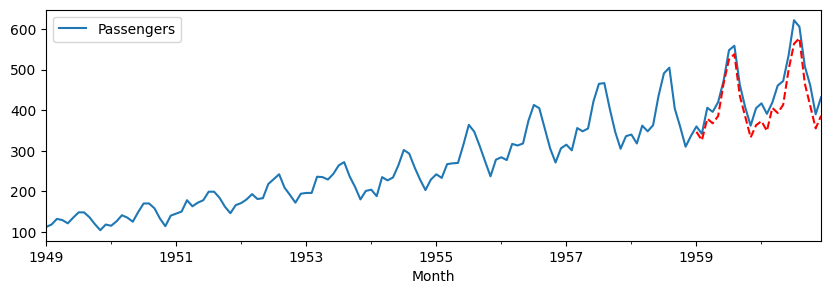

In [48]:
y.plot()
pred.plot(style='r--')

In [49]:
metrics.rmse(comp, pred)

37.09115343356162

In [50]:
metrics.mae(comp, pred)

33.804637521003606